# Practiced Project: K-Means Clustering

This project is for me to practice the learnings from the Dataquest course. I decided to do some practice for me to understand by applying the codes in the course. I will try to make my own codes for future references.

Using cars dataset, taken from [kaggle](https://www.kaggle.com/abineshkumark/carsdata/version/1). Cars Data has Information about 3 brands/make of cars. Namely US, Japan, Europe. Target of the data set to find the brand of a car using the parameters such as horsepower, Cubic inches, Make year, etc.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline
pd.options.display.max_columns = 99
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load file into df
cars = pd.read_csv('cars.csv')
print(cars.shape)
cars.head()

(261, 8)


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [3]:
# Need to clean the columns bec it has whitespaces
cars.columns = cars.columns.str.replace(' ', '')

In [4]:
# Initialize variables
num_clusters = 5
title = 'Cars'
col1, col2 = 'mpg', 'hp'
col1_label, col2_label = 'Miles per Gallon', 'Horse Power'

Text(0, 0.5, 'Horse Power')

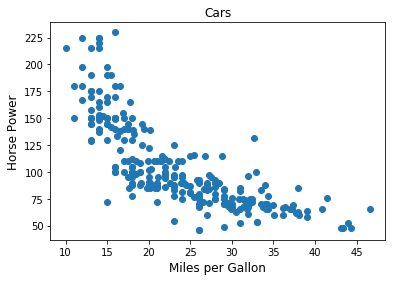

In [5]:
# Let's visual first what to cluster using hp and mpg
plt.scatter(cars[col1], cars[col2])
plt.title(title)
plt.xlabel(col1_label, fontsize=12)
plt.ylabel(col2_label, fontsize=12)

Text(0, 0.5, 'Horse Power')

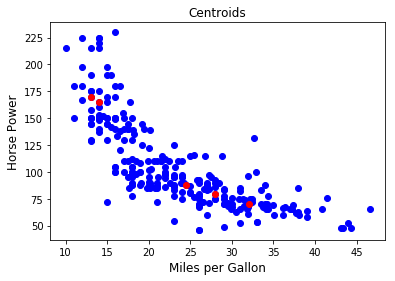

In [6]:
# Create a Centroids
random_initial_points = np.random.choice(cars.index, size=num_clusters)
centroids = cars.loc[random_initial_points]
# Visualize
plt.scatter(cars[col1], cars[col2], c='blue')
plt.scatter(centroids[col1], centroids[col2], c='red')
plt.title('Centroids')
plt.xlabel(col1_label, fontsize=12)
plt.ylabel(col2_label, fontsize=12)

Create a unique identifier to refer each cluster centroid and list representation of the centroid's coordinates

In [7]:
def centroids_to_dict(centroids, col1, col2):
    dictionary = dict()
    # iterating counter we use to generate a cluster_id
    counter = 0

    # iterate a pandas data frame row-wise using .iterrows()
    for index, row in centroids.iterrows():
        coordinates = [row[col1], row[col2]]
        dictionary[counter] = coordinates
        counter += 1

    return dictionary

centroids_dict = centroids_to_dict(centroids, col1, col2)

In [8]:
centroids_dict

{0: [32.1, 70], 1: [28.0, 79], 2: [13.0, 170], 3: [14.0, 165], 4: [24.5, 88]}

Euclidean distance is the most common technique used in data science for measuring distance between vectors and works extremely well in 2 and 3 dimensions. While in higher dimensions, Euclidean distance can be misleading, in 2 dimensions Euclidean distance is essentially the Pythagorean theorem.

In [9]:
import math

def calculate_distance(centroid, player_values):
    root_distance = 0
    
    for x in range(0, len(centroid)):
        difference = centroid[x] - player_values[x]
        squared_difference = difference**2
        root_distance += squared_difference

    euclid_distance = math.sqrt(root_distance)
    return euclid_distance

In [10]:
def assign_to_cluster(row, col1, col2):
    lowest_distance = -1
    closest_cluster = -1
    
    for cluster_id, centroid in centroids_dict.items():
        df_row = [row[col1], row[col2]]
        euclidean_distance = calculate_distance(centroid, df_row)
        
        if lowest_distance == -1:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id
        elif euclidean_distance < lowest_distance:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id
    return closest_cluster

In [11]:
cars['cluster'] = cars.apply(lambda row: assign_to_cluster(row, col1, col2), axis=1)
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,cluster
0,14.0,8,350,165,4209,12,1972,US.,3
1,31.9,4,89,71,1925,14,1980,Europe.,0
2,17.0,8,302,140,3449,11,1971,US.,3
3,15.0,8,400,150,3761,10,1971,US.,3
4,30.5,4,98,63,2051,17,1978,US.,0


In [12]:
# Visualizing clusters
def visualize_clusters(df, num_clusters, col1, col2):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df[col1], clustered_df[col2], c=colors[n-1])
        plt.xlabel(col1_label, fontsize=12)
        plt.ylabel(col2_label, fontsize=12)
    plt.show()

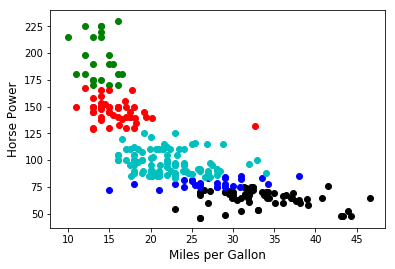

In [13]:
visualize_clusters(cars, num_clusters, col1, col2)

In [14]:
def recalculate_centroids(df, col1, col2):
    new_centroids_dict = dict()
    
    for cluster_id in range(0, num_clusters):
        values_in_cluster = df[df['cluster'] == cluster_id]
        # Calculate new centroid using mean of values in the cluster
        new_centroid = [np.average(values_in_cluster[col1]), np.average(values_in_cluster[col2])]
        new_centroids_dict[cluster_id] = new_centroid
    return new_centroids_dict

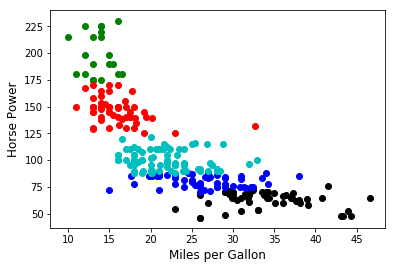

In [15]:
# Recalculate and visual
centroids_dict = recalculate_centroids(cars, col1, col2)
cars['cluster'] = cars.apply(lambda row: assign_to_cluster(row, col1, col2), axis=1)
visualize_clusters(cars, num_clusters, col1, col2)

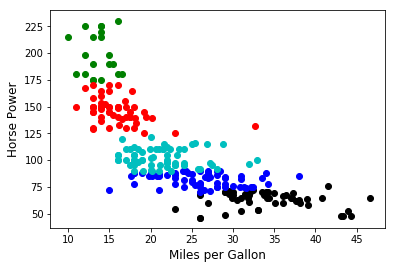

In [16]:
# Now we need to recalculate the centroids, and shift the clusters again.
centroids_dict = recalculate_centroids(cars, col1, col2)
cars['cluster'] = cars.apply(lambda row: assign_to_cluster(row, col1, col2), axis=1)
visualize_clusters(cars, num_clusters, col1, col2)

K-Means does some intelligent things like re-running the entire clustering process lots of times with random initial centroids so the final results are a little less biased on one passthrough's initial centroids.

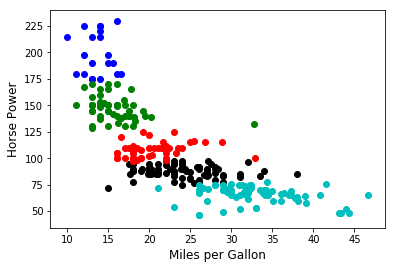

In [17]:
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(cars[[col1, col2]])
cars['cluster'] = kmeans.labels_

visualize_clusters(cars, num_clusters, col1, col2)